In [6]:
from pymilvus import MilvusClient

client = MilvusClient('http://localhost:19530')

In [7]:
client.list_collections()


['openai_01', 'openai_02', 'openai_00']

In [4]:
client.drop_collection("openai_02")

In [21]:
from embeddings import OpenAIEmbeddingFunction
import json


openai_ef = OpenAIEmbeddingFunction(
    model_name="text-embedding-3-small", # Specify the model name
    dimensions=1536 # Set the embedding dimensionality according to MRL feature.
)

res = client.search(
    collection_name="openai_01",
    data=openai_ef.encode_queries(["rage"]),
    limit=5
)[0]

r
# for r in res:
#     x = json.loads(r['entity']['_node_content'])['text']
#     print(x)

{'id': 's02_e09_c02_u010',
 'distance': 0.3153645992279053,
 'entity': {'_node_content': '{"id_": "s02_e09_c02_u010", "embedding": null, "metadata": {"speaker": "Ross Geller", "conversation_id": "s02_e09_c02_u001"}, "excluded_embed_metadata_keys": [], "excluded_llm_metadata_keys": [], "relationships": {}, "text": "Here, go nuts.", "mimetype": "text/plain", "start_char_idx": null, "end_char_idx": null, "text_template": "{metadata_str}\\n\\n{content}", "metadata_template": "{key}: {value}", "metadata_seperator": "\\n", "class_name": "TextNode"}'}}

In [39]:
friends = ["Monica Geller", "Phoebe Buffay", "Joey Tribbiani", "Chandler Bing", "Ross Geller", "Rachel Green"]
res = client.query(
    collection_name="openai_02",
    output_fields=["_node_content", "speaker", "embedding", "season"],
    limit=4,
)

res[0]

{'speaker': 'Monica Geller',
 'season': 's01',
 '_node_content': '{"id_": "s01_e01_c01_u001", "embedding": null, "metadata": {"speaker": "Monica Geller", "conversation_id": "s01_e01_c01_u001", "season": "s01", "episode": "e01", "scene": "c02"}, "excluded_embed_metadata_keys": [], "excluded_llm_metadata_keys": [], "relationships": {}, "text": "There\'s nothing to tell! He\'s just some guy I work with!", "mimetype": "text/plain", "start_char_idx": null, "end_char_idx": null, "text_template": "{metadata_str}\\n\\n{content}", "metadata_template": "{key}: {value}", "metadata_seperator": "\\n", "class_name": "TextNode"}',
 'embedding': [-0.022241333,
  -0.020084597,
  -0.048428513,
  -0.011482165,
  -0.019667955,
  0.00357822,
  0.059016123,
  0.04904122,
  0.013099716,
  -0.046908993,
  -0.00789169,
  -0.054849703,
  -0.0029149626,
  0.037669342,
  -0.016003957,
  0.0060964534,
  -0.048551053,
  -0.048428513,
  -0.041713223,
  0.018871434,
  0.041076005,
  0.05401642,
  0.020611528,
  0.028

In [75]:
import pandas as pd
import numpy as np


df = pd.DataFrame({
    "embedding": [result["embedding"] for result in res],
    "speaker": [result["speaker"] for result in res]
})

# Create the matrix
matrix = np.vstack(df["embedding"].to_numpy())
print(f"Matrix shape: {matrix.shape}")

Matrix shape: (16037, 1536)


In [79]:
from sklearn.cluster import KMeans

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df['Clusters'] = pd.Series(name="Clusters", data=kmeans.labels_)

In [80]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

KeyboardInterrupt: 

: 

In [78]:
df['Clusters']

RecursionError: maximum recursion depth exceeded in __instancecheck__

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

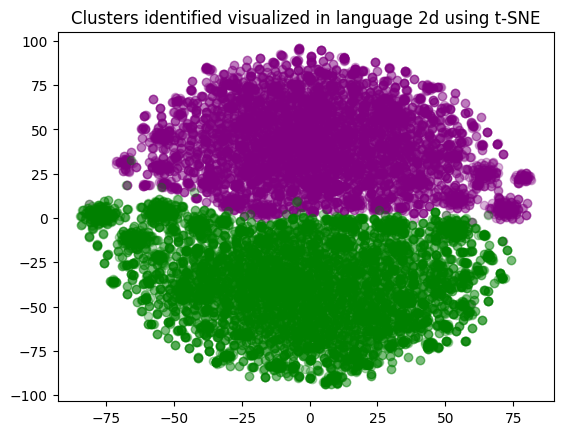

In [74]:
x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green"]):
    xs = np.array(x)[df['Clusters'] == category]
    ys = np.array(y)[df['Clusters'] == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")